### This is meant to be run in colab.

In [3]:
!nvidia-smi

Wed Aug 16 11:48:45 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.19       Driver Version: 472.19       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P8     6W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
pip install keras-vis

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install tf-keras-vis tensorflow

     ---------------------------------------- 52.1/52.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

# I was getting an import error while trying to import utils, this is the stackoverflow solution
# I had to go into utils and change from collections to from collections.abc

from vis.utils import utils


from tensorflow.keras.applications.vgg16 import decode_predictions
import json



In [8]:
# utility function to show images
def display_imgs(images):
  subprot_args = {
   'nrows': 1,
   'ncols': 2,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
  }
  f, ax = plt.subplots(**subprot_args)
  for i in range(len(images)):
    ax[i].imshow(images[i])
  plt.tight_layout()
  plt.show()

In [9]:
# include_top signifies whether or not to import with the fully connected layers
model = VGG16(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 [==============================] - 56s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [10]:
img1 = load_img('cat.jpg', target_size=(224,224))
img2 = load_img('golden ret.jpeg', target_size=((224,224)))


FileNotFoundError: [Errno 2] No such file or directory: 'cat.jpg'

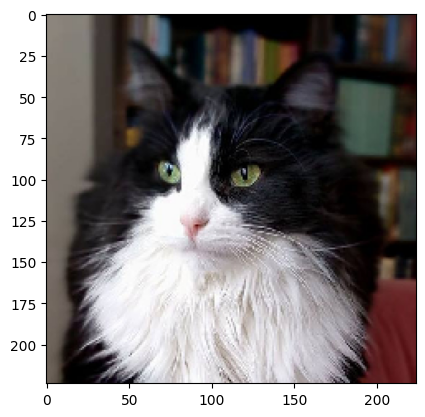

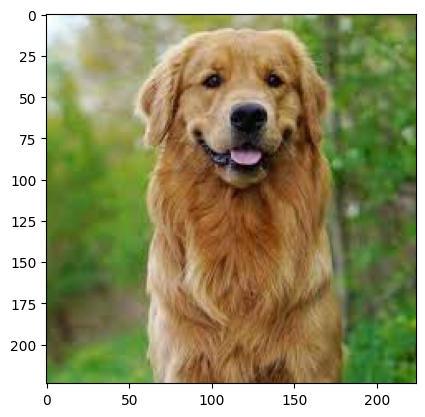

In [ ]:
plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

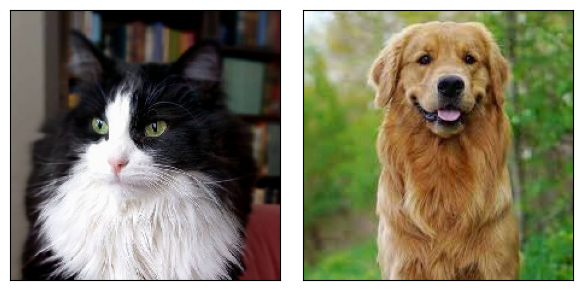

In [ ]:
#create array of images
images = np.asarray([np.array(img1), np.array(img2)])
display_imgs(images)

In [ ]:
# before we give the img1 and img2 to VGG16 we need to convert it to numpy array
img1 = img_to_array(img1)
img2 = img_to_array(img2)

# reshape for VGG16
img1 = img1.reshape(1,224,224,3)
img2 = img2.reshape(1,224, 224,3)

img1=preprocess_input(img1)
img2 = preprocess_input(img2)


In [ ]:
yhat1 = model.predict(img1)
yhat2 = model.predict(img2)

1/1 [==============================] - 0s 36ms/step


In [ ]:
print(yhat1,yhat2)

[[1.81380017e-07 8.30248882e-06 5.13075349e-07 5.29801980e-07
  2.49780044e-07 1.18415824e-06 2.18608577e-07 1.52661232e-04
  6.11413707e-05 3.20874788e-05 3.51655785e-06 2.45208794e-05
  3.80417009e-06 4.04309103e-04 1.35146286e-06 3.74355077e-05
  4.03946615e-04 2.77553154e-05 8.91083095e-04 1.04582505e-05
  2.30124206e-05 1.10251189e-04 7.25656806e-04 1.23795471e-04
  1.84963355e-04 5.57237115e-07 7.17477974e-07 1.65098538e-06
  6.00779003e-07 3.19879200e-06 4.64431622e-07 6.24033134e-07
  1.33945221e-07 1.67242405e-07 4.26526725e-07 1.56194903e-06
  6.65149901e-06 9.45568274e-07 1.50711674e-06 3.37284155e-06
  7.16354953e-06 1.58013154e-06 7.41492443e-07 1.02181784e-05
  1.24217186e-05 4.75795417e-07 2.95744976e-05 5.05798141e-07
  2.58849610e-07 1.68150166e-07 6.76786158e-07 9.83424911e-07
  3.73502962e-06 2.09735608e-05 1.07861988e-05 6.93061475e-06
  6.00048725e-06 4.06801564e-06 1.51332563e-06 2.40924182e-05
  4.07881016e-05 1.51447932e-06 6.21265428e-07 1.99739748e-06
  3.3485

In [ ]:
label1 = decode_predictions(yhat1)
label2 = decode_predictions(yhat2)

In [ ]:
print(label1)

[[('n02123394', 'Persian_cat', 0.19674373), ('n02971356', 'carton', 0.09951706), ('n02123045', 'tabby', 0.08675058), ('n03325584', 'feather_boa', 0.039855026), ('n02883205', 'bow_tie', 0.026153773)]]


In [ ]:
label1 = label1[0][0]
label2 = label2[0][0]
print(label1,label2)
# predictions are correct

('n02123394', 'Persian_cat', 0.19674373) ('n02099601', 'golden_retriever', 0.93613935)


In [ ]:
# need to download a file which has all the 1000 classes of VGG16
!wget "https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json"

--2023-08-16 05:31:05--  https://raw.githubusercontent.com/raghakot/keras-vis/master/resources/imagenet_class_index.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35363 (35K) [text/plain]
Saving to: ‘imagenet_class_index.json.3’

imagenet_class_inde 100%[===================>]  34.53K  --.-KB/s    in 0s      

2023-08-16 05:31:05 (116 MB/s) - ‘imagenet_class_index.json.3’ saved [35363/35363]



In [ ]:
# prepare the 1000 classes
CLASS_INDEX = json.load(open("imagenet_class_index.json"))
classlabel = []
for i_dict in range(len(CLASS_INDEX)):
    classlabel.append(CLASS_INDEX[str(i_dict)][1])
print("N of class={}".format(len(classlabel)))

N of class=1000


In [ ]:
#Top 5 classes predicted
class_idxs_sorted1 = np.argsort(yhat1.flatten())[::-1]
class_idxs_sorted2 = np.argsort(yhat2.flatten())[::-1]


topNclass         = 5

print('\nfirst image\n')
for i, idx in enumerate(class_idxs_sorted1[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat1[0,idx]))

print('\nsecond image\n')
for i, idx in enumerate(class_idxs_sorted2[:topNclass]):
    print("Top {} predicted class:     Pr(Class={:18} [index={}])={:5.3f}".format(
          i + 1,classlabel[idx],idx,yhat2[0,idx]))



first image

Top 1 predicted class:     Pr(Class=Persian_cat        [index=283])=0.197
Top 2 predicted class:     Pr(Class=carton             [index=478])=0.100
Top 3 predicted class:     Pr(Class=tabby              [index=281])=0.087
Top 4 predicted class:     Pr(Class=feather_boa        [index=552])=0.040
Top 5 predicted class:     Pr(Class=bow_tie            [index=457])=0.026

second image

Top 1 predicted class:     Pr(Class=golden_retriever   [index=207])=0.936
Top 2 predicted class:     Pr(Class=Tibetan_mastiff    [index=244])=0.008
Top 3 predicted class:     Pr(Class=Sussex_spaniel     [index=220])=0.007
Top 4 predicted class:     Pr(Class=flat-coated_retriever [index=205])=0.007
Top 5 predicted class:     Pr(Class=Labrador_retriever [index=208])=0.006


In [ ]:
# now let us use gradcam
# we dont want the final softmax layer as that is responsible for the final classification
# instead we want to get info of what contributed to the final prediction
# therefore replace the final layer with a linear layer
layer_idx = utils.find_layer_idx(model, 'predictions')
model.layers[-1].activation = tf.keras.activations.linear
model = utils.apply_modifications(model)

In [ ]:
# Golden retriever idx = 207
# Madagascar cat idx = 283
from tf_keras_vis.utils.scores import CategoricalScore
score = CategoricalScore([283,207])

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam


input_classes = ['Cat', 'Dog']
input_images = preprocess_input(images)


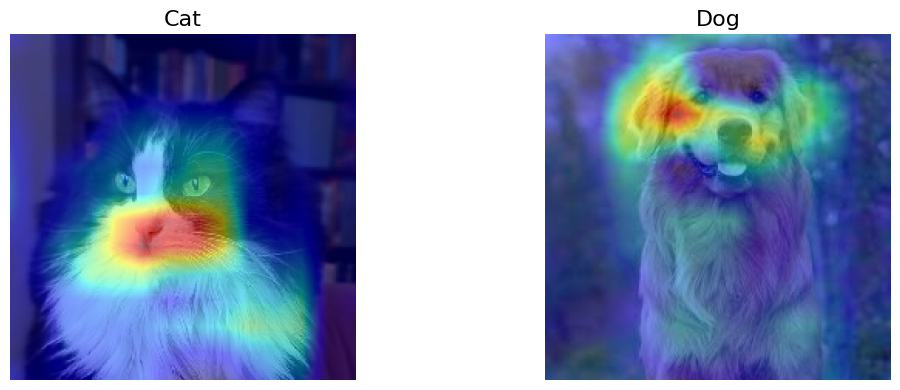

In [ ]:
gradcam = Gradcam(model, clone=True)

# generate heatmap with gradcam
cam = gradcam(score, input_images, penultimate_layer= -1)

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
for i, img_class in enumerate(input_classes):
  heatmap = np.uint8(cm.jet(cam[i])[..., :4] * 255)
  ax[i].set_title(img_class, fontsize=16)
  ax[i].imshow(images[i])
  ax[i].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
  ax[i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize


In [ ]:
#Create Saliency object
saliency = Saliency(model, clone=False)

# Generate saliency map
saliency_map = saliency(score, input_images)
saliency_map = normalize(saliency_map)

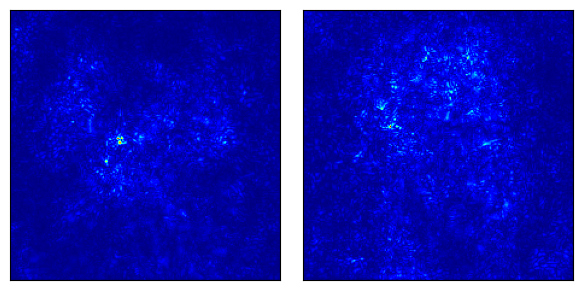

In [ ]:
subprot_args = {
   'nrows': 1,
   'ncols': 2,
   'figsize': (6, 3),
   'subplot_kw': {'xticks': [], 'yticks': []}
}
f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
   ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

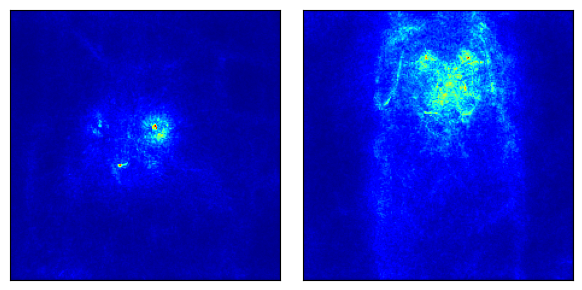

In [ ]:
# let us try a smoother version of saliency maps
saliency_map = saliency(score, input_images, smooth_samples=20)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subprot_args)
for i in range(len(saliency_map)):
   ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()
# but why this does result in a better visualization, That is because when set smooth_samples is set to above 0 it acts as an implementation
# of SmoothGRAD.